In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import kagglehub

# Step 1: Download Dataset
# Download dataset from KaggleHub
path = kagglehub.dataset_download("walidguirat/office-object-detection")

print("Path to dataset files:", path)

# Path to dataset
train_path = path + '/train'
valid_path = path + '/validation'


100%|██████████| 8.81G/8.81G [03:52<00:00, 40.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1


In [19]:
import os
print(os.listdir(path))


In [24]:
import os
import shutil
import random

dataset_path = "/root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images"
split_folders = ['train', 'valid', 'test']

In [25]:
# Create Split Folders
for folder in split_folders:
    for class_folder in os.listdir(dataset_path):
        os.makedirs(f"{dataset_path}/{folder}/{class_folder}", exist_ok=True)

# Split Function
def split_data(class_folder, split_ratio):
    images = os.listdir(f"{dataset_path}/{class_folder}")
    random.shuffle(images)

    train_size = int(split_ratio[0] * len(images))
    valid_size = int(split_ratio[1] * len(images))

    for img in images[:train_size]:
        shutil.move(f"{dataset_path}/{class_folder}/{img}", f"{dataset_path}/train/{class_folder}/{img}")

    for img in images[train_size:train_size + valid_size]:
        shutil.move(f"{dataset_path}/{class_folder}/{img}", f"{dataset_path}/valid/{class_folder}/{img}")

    for img in images[train_size + valid_size:]:
        shutil.move(f"{dataset_path}/{class_folder}/{img}", f"{dataset_path}/test/{class_folder}/{img}")

# 70% Train, 20% Validation, 10% Test Split
split_ratio = [0.7, 0.2, 0.1]

for folder in os.listdir(dataset_path):
    if folder not in split_folders:
        split_data(folder, split_ratio)

print("Dataset Split Done ✅")

Dataset Split Done ✅


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    dataset_path + '/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    dataset_path + '/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

print("Dataset Loaded Successfully ✅")


Found 41730 images belonging to 8 classes.
Found 11867 images belonging to 8 classes.
Found 5861 images belonging to 8 classes.
Dataset Loaded Successfully ✅


In [27]:
# Remove empty folders
def remove_empty_folders(folder_path):
    for folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, folder)
        if os.path.isdir(class_path) and len(os.listdir(class_path)) == 0:
            print(f"Removing empty folder: {class_path}")
            os.rmdir(class_path)

remove_empty_folders(dataset_path)

import os

def remove_empty_folders(folder):
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path) and len(os.listdir(subfolder_path)) == 0:
            print(f"Deleting empty folder: {subfolder_path}")
            os.rmdir(subfolder_path)

for split in ['train', 'valid', 'test']:
    remove_empty_folders(f"{dataset_path}/{split}")

print("✅ Empty folders removed.")

print("Train Classes:", os.listdir(dataset_path + '/train'))
print("Valid Classes:", os.listdir(dataset_path + '/valid'))
print("Test Classes:", os.listdir(dataset_path + '/test'))

Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/train/train
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/train/test
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/train/valid
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/valid/train
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/valid/test
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/valid/valid
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-object-detection/versions/1/downloaded_images/test/train
Deleting empty folder: /root/.cache/kagglehub/datasets/walidguirat/office-objec

In [28]:
def sync_classes():
    train_classes = set(os.listdir(dataset_path + '/train'))
    valid_classes = set(os.listdir(dataset_path + '/valid'))
    test_classes = set(os.listdir(dataset_path + '/test'))

    # Find common classes
    common_classes = train_classes.intersection(valid_classes).intersection(test_classes)
    print("✅ Common Classes:", common_classes)

    # Delete folders not in common classes
    for split in ['train', 'valid', 'test']:
        for folder in os.listdir(dataset_path + '/' + split):
            if folder not in common_classes:
                print(f"Deleting {folder} from {split}")
                shutil.rmtree(f"{dataset_path}/{split}/{folder}", ignore_errors=True)

sync_classes()

train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    dataset_path + '/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    dataset_path + '/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

✅ Common Classes: {'dining table', 'keyboard', 'person', 'chair', 'laptop'}
Found 41730 images belonging to 5 classes.
Found 11867 images belonging to 5 classes.
Found 5861 images belonging to 5 classes.


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model Architecture
model = models.Sequential()

# First Convolution Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolution Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))

# Output Layer
model.add(layers.Dense(5, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=5,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1417s 1s/step - accuracy: 0.4992 - loss: 1.3193 - val_accuracy: 0.5325 - val_loss: 1.1299
Epoch 2/5
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1397s 1s/step - accuracy: 0.5356 - loss: 1.1270 - val_accuracy: 0.5471 - val_loss: 1.1018
Epoch 3/5
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1451s 1s/step - accuracy: 0.5578 - loss: 1.0505 - val_accuracy: 0.5462 - val_loss: 1.1088
Epoch 4/5
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1442s 1s/step - accuracy: 0.6032 - loss: 0.9444 - val_accuracy: 0.5294 - val_loss: 1.1519
Epoch 5/5
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1370s 1s/step - accuracy: 0.6405 - loss: 0.8393 - val_accuracy: 0.4981 - val_loss: 1.2214


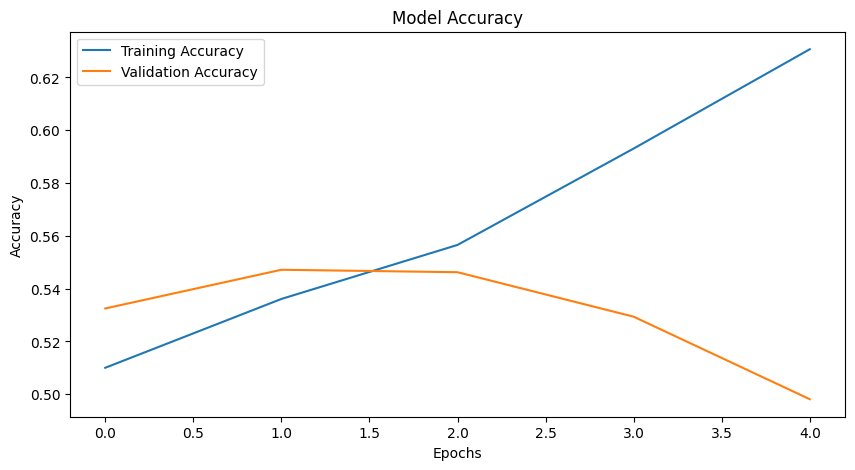

In [32]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

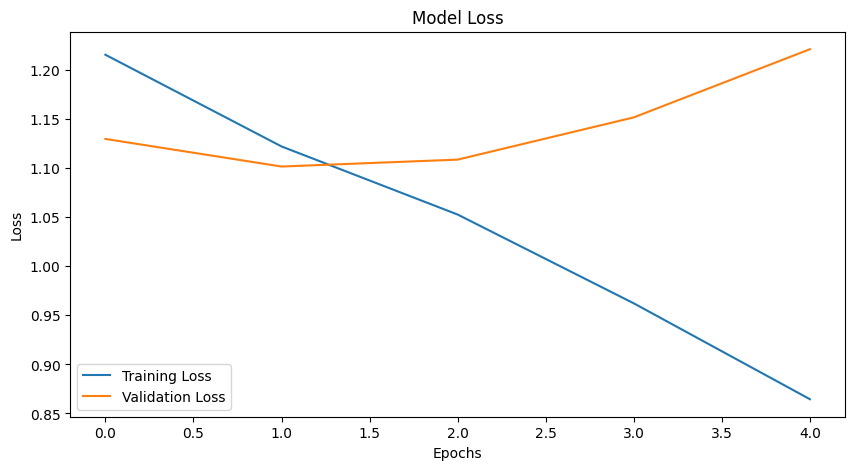

In [33]:
# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(valid_generator.classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

              precision    recall  f1-score   support

       chair       0.20      0.19      0.19      2524
dining table       0.19      0.15      0.16      2383
    keyboard       0.05      0.03      0.04       415
      laptop       0.07      0.07      0.07       685
      person       0.49      0.56      0.53      5860

    accuracy                           0.35     11867
   macro avg       0.20      0.20      0.20     11867
weighted avg       0.33      0.35      0.34     11867



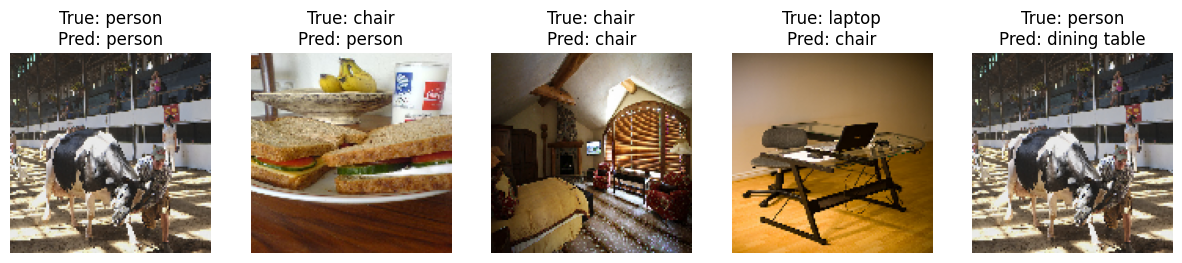

In [34]:
from sklearn.metrics import classification_report

print(classification_report(valid_generator.classes, y_pred, target_names=list(train_generator.class_indices.keys())))

import random

misclassified = np.where(y_pred != valid_generator.classes)[0]

if len(misclassified) > 0:
    plt.figure(figsize=(15, 8))
    batch = next(iter(valid_generator))
    imgs, labels = batch
    for i in range(min(5, len(misclassified))):  # Ensure at most 5 samples are displayed
        idx = random.choice(misclassified)
        plt.subplot(1, 5, i + 1)
        plt.imshow(imgs[idx % len(imgs)])
        true_label = list(train_generator.class_indices.keys())[np.argmax(labels[idx % len(labels)])]
        pred_label = list(train_generator.class_indices.keys())[y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()
else:
    print("No misclassified images to display.")